In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


VISUALIZATION

Text(0.5, 1.0, 'Ages VS Charges')

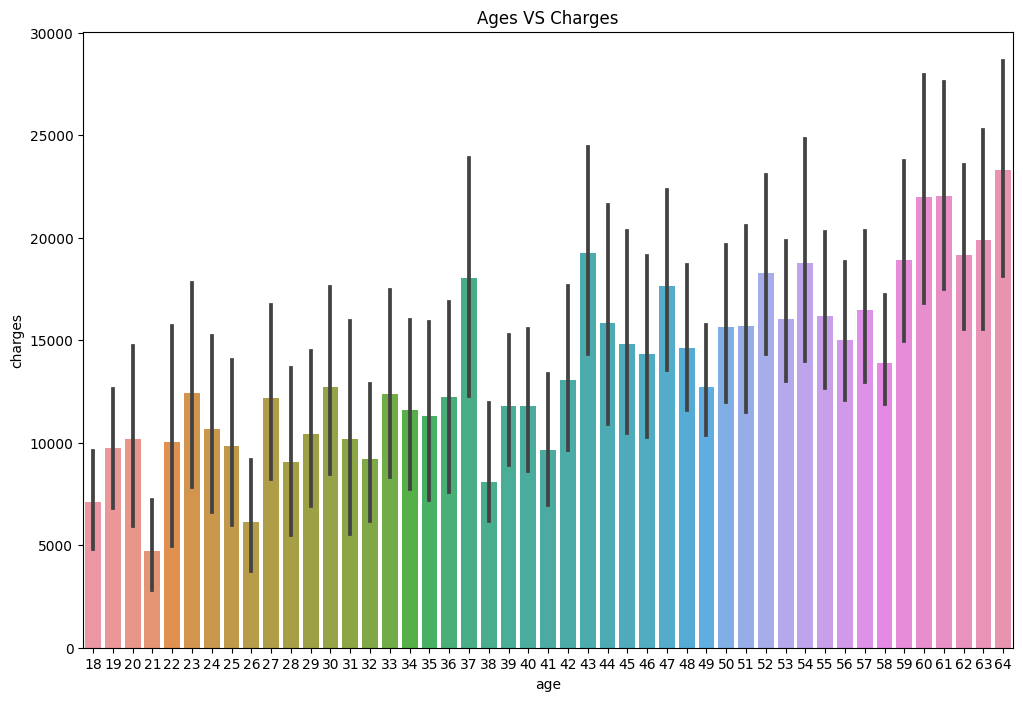

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(x="age", y="charges", data=data)
plt.title("Ages VS Charges")

Text(0.5, 1.0, 'Sex VS Charges')

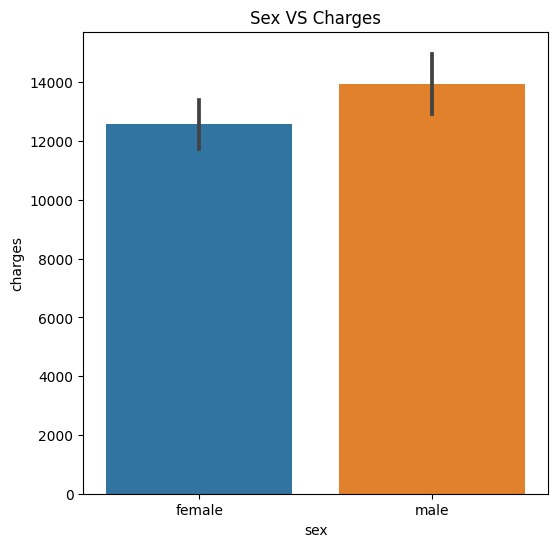

In [13]:
plt.figure(figsize=(6,6))
sns.barplot(x="sex", y="charges", data=data)
plt.title("Sex VS Charges")

Text(0.5, 1.0, 'Smoker VS Charges')

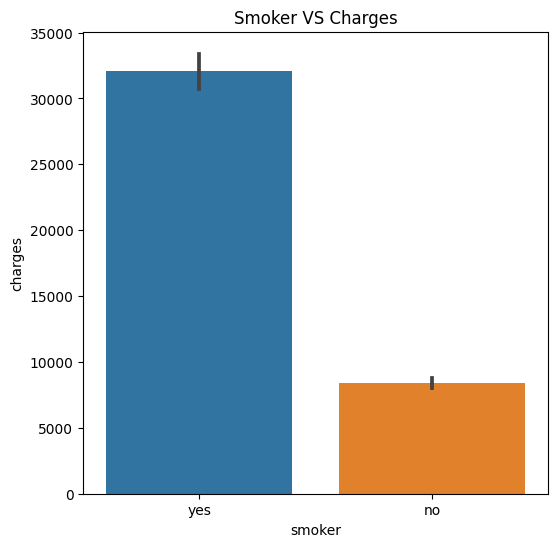

In [14]:
plt.figure(figsize=(6,6))
sns.barplot(x="smoker", y="charges", data=data)
plt.title("Smoker VS Charges")

Text(0.5, 1.0, 'Region VS Charges')

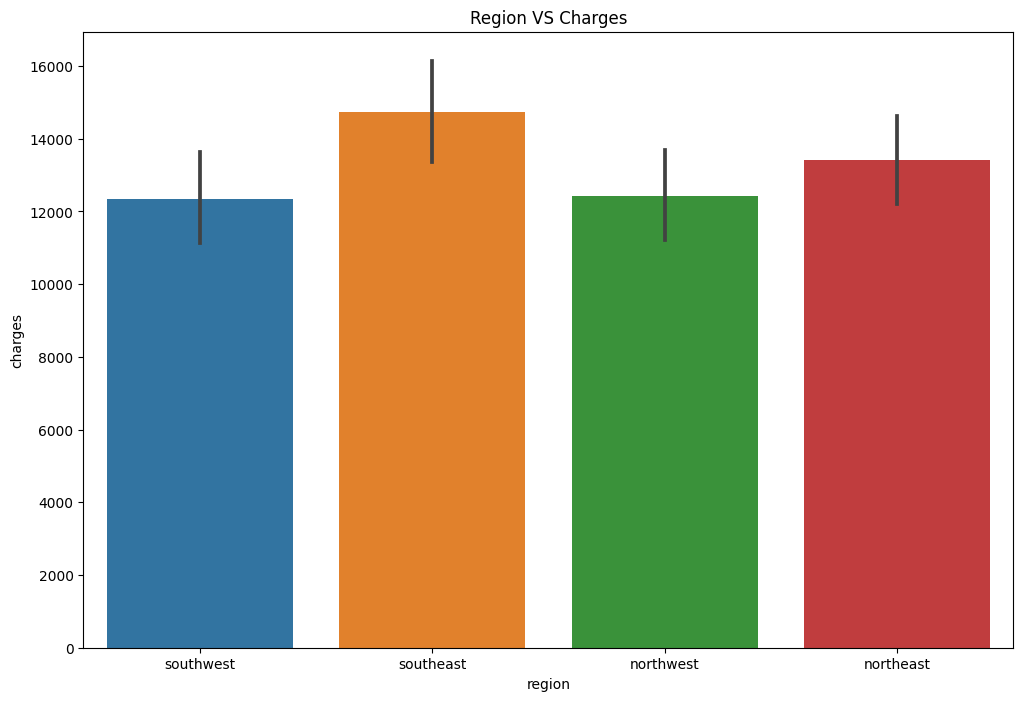

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(x="region", y="charges", data=data)
plt.title("Region VS Charges")

/var/folders/7f/hyd9bmcx1dxd4b4gx883gwj00000gn/T/ipykernel_6872/842560596.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool),


<AxesSubplot:>

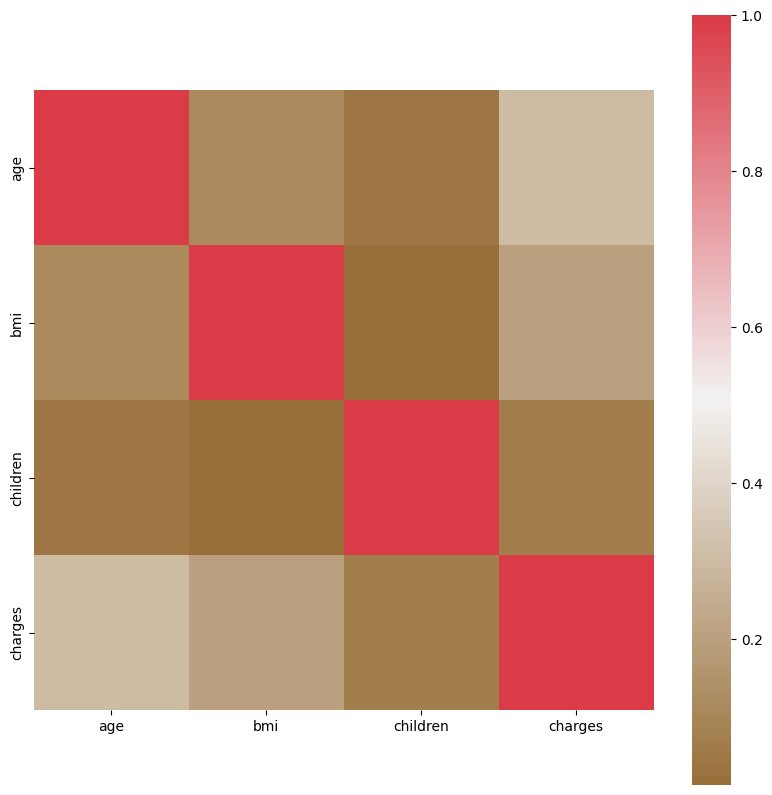

In [16]:
f, ax = plt.subplots(figsize = (10, 10))

corr = data.corr()
sns.heatmap(corr, mask = np.zeros_like(corr, dtype = np.bool), 
            cmap = sns.diverging_palette(50, 10, as_cmap = True), square = True, ax = ax)

In [17]:
data = data.drop("region", axis=1)
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges'], dtype='object')


LABEL ENCODING

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["sex"] = le.fit_transform(data["sex"])
data["smoker"] = le.fit_transform(data["smoker"])

data["smoker"].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

In [20]:
data["sex"].value_counts()

1    676
0    662
Name: sex, dtype: int64

In [21]:
X = data.drop(columns=["charges"])
y = data["charges"]

Splitting the dataset into the Training set and Test set

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=1)

Fit the Model & Predict, Check the Accuracy

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score, r2_score
from math import sqrt

LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print("MSE:", MSE)

RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE: 36910222.279693276
RMSE:  6075.378365146757
R2 : 0.7397570354983795


In [30]:
from sklearn.svm import SVR

svrmodel = SVR()

svrmodel.fit(X_train, y_train)
y_pred = svrmodel.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  166827484.1517451
RMSE:  12916.171420035625
R2 : -0.17625081493706074


In [31]:
from sklearn.tree import DecisionTreeRegressor

dtrmodel = DecisionTreeRegressor()

dtrmodel.fit(X_train, y_train)
y_pred = dtrmodel.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  45508863.60196215
RMSE:  6746.025763511591
R2 : 0.679130581085925


In [32]:
from sklearn.ensemble import RandomForestRegressor

rfrmodel = RandomForestRegressor(n_estimators = 40, max_depth = 4, n_jobs = -1)

rfrmodel.fit(X_train, y_train)
y_pred = rfrmodel.predict(X_test)

MSE = mean_squared_error(y_test, y_pred)
print('MSE: ', MSE)

RMSE = sqrt(mean_squared_error(y_test, y_pred))       
print('RMSE: ', RMSE)

R2 = r2_score(y_test, y_pred)
print('R2 :', R2)

MSE:  22752927.943133038
RMSE:  4770.0029290486855
R2 : 0.8395758937959474


RandomForest is our best model for this data according to the R2 score